In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression

# Generate Data

In [10]:
# Create dummy dataset and visualize it
X, y = make_regression(n_samples=100, n_features=1, n_informative=2, noise=10, random_state=42)

def plot_X_and_y(X, y, title = None):
    # Plot settings
    fig, ax = plt.subplots(nrows=1, ncols=1)
    sns.scatterplot(x=X.flatten(), y=y, ax=ax, edgecolor="black", alpha=0.8)
    if title is None:
        title = "Toy Dataset"
    ax.set_title(title, fontweight="bold", size=16)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("y")
    plt.show()


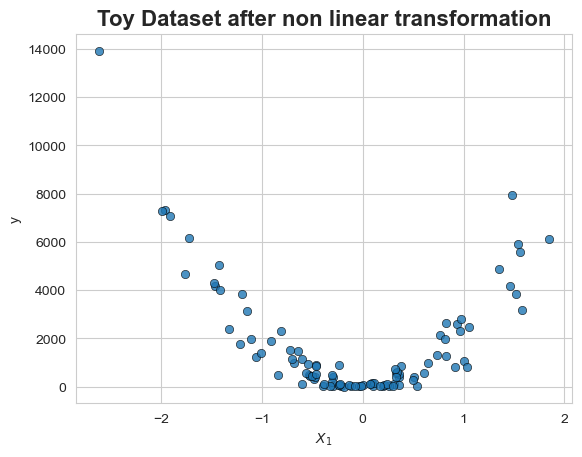

In [11]:
# Transform y non-linear and plot results
y = y**2
plot_X_and_y(X, y, title="Toy Dataset after non linear transformation")

# Get OLS solution
In generalized form the solution stays the same as in the OLS, but instead we use the basis function matrix $\Phi$ instead of our input matrix $X$:
$$ w^* = (\Phi^T\Phi)^{-1} \Phi^Ty $$

In principle, this allows us to learn any non-linear function, if we know suitable basis functions (which is typically not the case).

In [12]:
def get_optimal_weights(X, y) -> np.array:
    # Add column of 1 to add bias
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    # Compute optimal weights w
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

In [13]:
def compute_y_pred(X, w) -> np.array:
    # Add column of 1 to add bias
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    y_pred = X @ w
    return y_pred

def compute_residuals(y, y_pred) -> np.array:
    return y - y_pred

def evaluate_model(X, y) -> np.array:
    w = get_optimal_weights(X, y)
    y_pred = compute_y_pred(X, w)
    y_mean = np.mean(y)

    RSS = np.sum(compute_residuals(y, y_pred) ** 2)
    TSS = np.sum((y - y_mean) ** 2)

    r_squared = 1 - RSS/TSS
    return r_squared

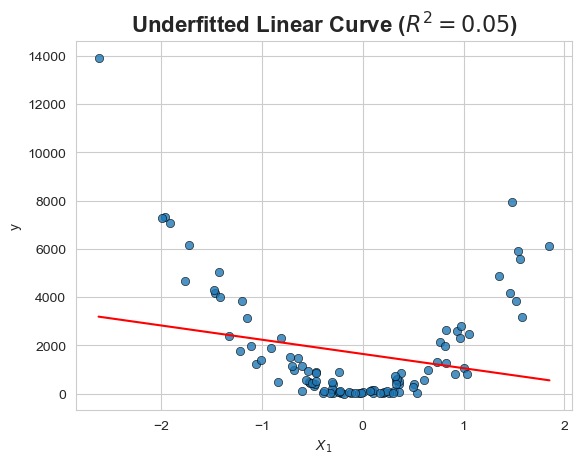

In [14]:
def plot_data_and_regression(X, y, title):
    w = get_optimal_weights(X, y)
    y_pred = compute_y_pred(X, w)

    r_squared = evaluate_model(X, y)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    ax.set_title(label=f"{title} ($R^2 = {r_squared:.2f}$)", fontweight="bold", size=16)
    ax.set_xlabel("$X_1$")
    ax.set_ylabel("y")
    sns.scatterplot(x=X[:,0].flatten(), y=y, ax=ax, edgecolor="black", alpha=0.8)
    sns.lineplot(x=X[:,0].flatten(), y=y_pred, ax=ax, color="red")
    plt.show()

plot_data_and_regression(X, y, title="Underfitted Linear Curve")

# Generalized Linear Regression
We use $\phi(x)$ as a vector valued function of the input vector $x$. This is also called linear basis function models and $\phi(x)$ is known as basis functions: $$ f(x) = \phi(x)^T w $$
In this case we will use $\phi(x) = [x_1, x_1^2]^T$.

In [15]:
def get_basis_function(X) -> np.array:
    return np.concatenate([X, X**2], axis=1)

Phi = get_basis_function(X)
Phi.shape

(100, 2)

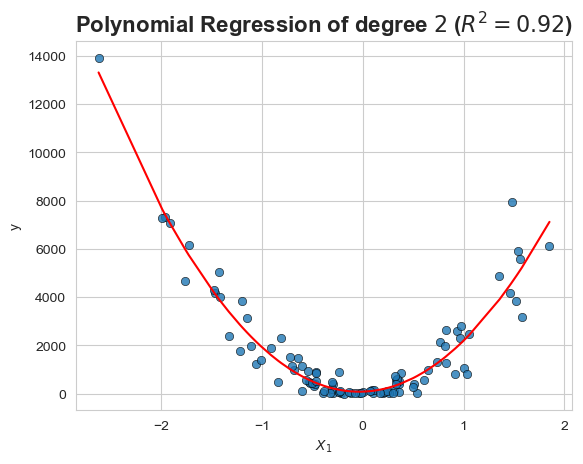

In [16]:
plot_data_and_regression(Phi, y, title="Polynomial Regression of degree $2$")